In [1]:
# One Class SVM (OCSVM)

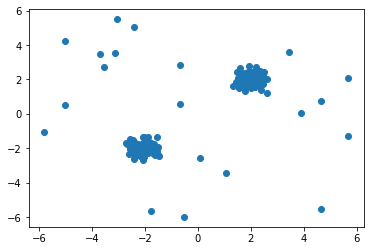

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

# Create 2 groups of samples by using 2 gaussians
N = 200
data1 = 0.3 * np.random.randn(N // 2, 2) + [2,2]
data2 = 0.3 * np.random.randn(N // 2, 2) - [2,2]

# Create 10% of random outliers
outliers = np.random.uniform(size=(N // 10, 2), low=-6, high=6)

# Grouping data + outliers
X = np.concatenate((data1, data2, outliers))

plt.scatter(X[:,0], X[:,1]) and plt.show()

In [4]:
# Building the model with RBF kernel
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.05)
clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.05, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

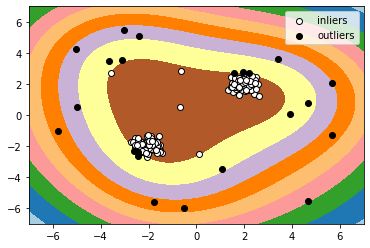

In [5]:
# Display points and vector near to separation hyperplane
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# choice of colors
plt.set_cmap(plt.cm.Paired)
# Trace the contout of decision function
plt.contourf(xx, yy, Z)
# Display the points considered as inliers
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='inliers')
# Display the points considered as outliers
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()

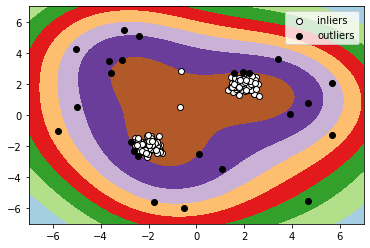

In [37]:
# Using other values of nu and gamma:

# Building the model with RBF kernel
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.06)
clf.fit(X)

# Display points and vector near to separation hyperplane
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# choice of colors
plt.set_cmap(plt.cm.Paired)
# Trace the contout of decision function
plt.contourf(xx, yy, Z)
# Display the points considered as inliers
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='inliers')
# Display the points considered as outliers
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()

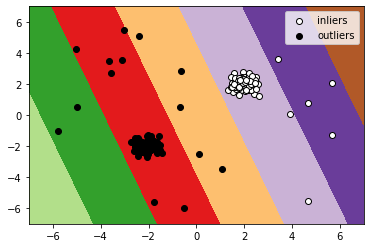

In [53]:
# Using a linear kernel:

# Building the model with RBF kernel
clf = svm.OneClassSVM(nu=0.1, kernel="linear", gamma=0.05)
clf.fit(X)

# Display points and vector near to separation hyperplane
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# choice of colors
plt.set_cmap(plt.cm.Paired)
# Trace the contout of decision function
plt.contourf(xx, yy, Z)
# Display the points considered as inliers
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='inliers')
# Display the points considered as outliers
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()

In [54]:
# Regression with SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR

In [13]:
# Generating data (sinus)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y

array([ 0.17070459,  0.17223995,  0.29714553,  0.30784371,  0.8146837 ,
        0.85785475,  0.92882129,  0.97312148,  0.9909411 ,  0.99999648,
        0.98677313,  0.98012512,  0.96834833,  0.94662506,  0.74237148,
        0.47377608,  0.47253156,  0.36944738,  0.27431959,  0.27161704,
        0.2573397 , -0.08500322, -0.41316935, -0.41739377, -0.46389278,
       -0.57481971, -0.60116189, -0.66697863, -0.71205985, -0.82839631,
       -0.85263825, -0.86026448, -0.86533779, -0.87073869, -0.90429018,
       -0.99188805, -0.99741398, -0.98855985, -0.96284111, -0.96015479])

In [14]:
# Adding some noise
y[::5] += 3 * (0.5 - np.random.rand(8))
y

array([ 1.05714879,  0.17223995,  0.29714553,  0.30784371,  0.8146837 ,
        0.72793457,  0.92882129,  0.97312148,  0.9909411 ,  0.99999648,
        1.74855419,  0.98012512,  0.96834833,  0.94662506,  0.74237148,
       -0.41257618,  0.47253156,  0.36944738,  0.27431959,  0.27161704,
       -0.92928335, -0.08500322, -0.41316935, -0.41739377, -0.46389278,
       -0.53395125, -0.60116189, -0.66697863, -0.71205985, -0.82839631,
       -1.84991906, -0.86026448, -0.86533779, -0.87073869, -0.90429018,
       -1.65954911, -0.99741398, -0.98855985, -0.96284111, -0.96015479])

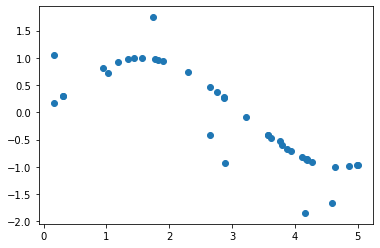

In [19]:
plt.scatter(X, y)
plt.show()

In [29]:
# Creating SVM for regression
C = 1000
# we use C = 1000 to reduce the importance of regularisation so we will
# have a curve more variable
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_lin = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)

# Training the model
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


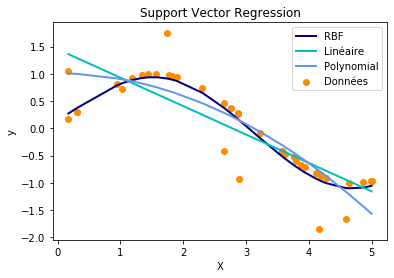

In [30]:
# Displaying results
plt.scatter(X, y, color='darkorange', label='Données')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF')
plt.plot(X, y_lin, color='c', lw=2, label='Linéaire')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()